# Processo de Análise Exploratória dos Dados

---



### Objetivo: realizar a exploração da base de dados

# 1 - Import das bibliotecas

In [ ]:
!pip install cffi>=1.17.0 tqdm>=4.64.1 numpy<2.0.0;
!pip install pysus;

/bin/bash: line 1: 2.0.0: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 715.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/24

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy

Configuração para visualização de dataset com muitas colunas

In [ ]:
pd.set_option('display.max_columns', None)

Define seed com Numpy

In [ ]:
np.random.seed(42)

# 2 - Import da base de dados

https://datasus.saude.gov.br/acesso-a-informacao/morbidade-hospitalar-do-sus-sih-sus/

https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

In [ ]:
from pysus import SIH
sih = SIH().load()
sih.metadata

{'long_name': 'Sistema de Informações Hospitalares',
 'source': ('https://datasus.saude.gov.br/acesso-a-informacao/morbidade-hospitalar-do-sus-sih-sus/',
  'https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/'),
 'description': 'A finalidade do AIH (Sistema SIHSUS) é a de transcrever todos os atendimentos que provenientes de internações hospitalares que foram financiadas pelo SUS, e após o processamento, gerarem relatórios para os gestores que lhes possibilitem fazer os pagamentos dos estabelecimentos de saúde. Além disso, o nível Federal recebe mensalmente uma base de dados de todas as internações autorizadas (aprovadas ou não para pagamento) para que possam ser repassados às Secretarias de Saúde os valores de Produção de Média e Alta complexidade além dos valores de CNRAC, FAEC e de Hospitais Universitários – em suas variadas formas de contrato de gestão.'}

In [ ]:
sih.groups

{'RD': 'AIH Reduzida',
 'RJ': 'AIH Rejeitada',
 'ER': 'AIH Rejeitada com erro',
 'SP': 'Serviços Profissionais',
 'CH': 'Cadastro Hospitalar',
 'CM': ''}

Quantidade de arquivos dentro do grupo AIH Reduzida

In [ ]:
print(str(len(sih.get_files(["RD"]))) + " files")

10753 files


Armazena arquivo selecionado na variável files. A tabela selecionada foi a do grupo AIH Reduzida do ano de 2023 do estado de SP

In [ ]:
files = sih.get_files(["RD"], uf=["SP"], year=2024, month=[1, 2, 3])
files

[RDSP2401.dbc, RDSP2402.dbc, RDSP2403.dbc]

Realiza download do arquivo

In [ ]:
sih.download(files)

RDSP2403.parquet: 100%|██████████| 849k/849k [00:43<00:00, 19.6kB/s]


[/root/pysus/RDSP2401.parquet,
 /root/pysus/RDSP2402.parquet,
 /root/pysus/RDSP2403.parquet]

Mostra as informações do arquivo de download

In [ ]:
for index in range(len(files)):
  print(sih.describe(files[index]))

{'name': 'RDSP2401.dbc', 'group': 'AIH Reduzida', 'uf': 'São Paulo', 'month': 'Janeiro', 'year': 2024, 'size': '17.5 MB', 'last_update': '2025-02-09 09:29PM'}
{'name': 'RDSP2402.dbc', 'group': 'AIH Reduzida', 'uf': 'São Paulo', 'month': 'Fevereiro', 'year': 2024, 'size': '17.3 MB', 'last_update': '2025-03-11 11:44PM'}
{'name': 'RDSP2403.dbc', 'group': 'AIH Reduzida', 'uf': 'São Paulo', 'month': 'Março', 'year': 2024, 'size': '19.0 MB', 'last_update': '2025-04-05 12:16PM'}


Armazena os dados em uma variável parquet

In [ ]:
for index in range(len(files)):
  parquet = sih.download(files[index])

17462541it [00:00, 18838273036.64it/s]
17268103it [00:00, 23125055391.22it/s]
18999157it [00:00, 26741020201.92it/s]


# 3 - Converte base de dados

Converte a variável em um dataframe com a biblioteca pandas

In [ ]:
df = parquet.to_dataframe()
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,NAT_JUR,GESTAO,RUBRICA,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,NUM_PROC,CAR_INT,TOT_PT_SP,CPF_AUT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,INSC_PN,SEQ_AIH5,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,352230,2024,03,03,60992427002270,3524115831412,1,18200001,352230,19480808,3,0,0,0,0,00,0,0,0,0,8,9,0303060212,0303060212,1050.05,40.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1090.22,0.00,210.87,20240321,20240329,I509,0000,41,00,3999,1,0,0,352230,4,75,8,1,010,,02,0,,0,0,0,,00,00,1,000000000000,000,000000,000,0,00000,0,000000000000000,,3139050,,,0000,0000,02,06,,0000,01,0000,649,HM35223001N202403.DTS,,,0.00,0.00,0.00,0.00,0.00,00,I500,,,,,,,,,1,0,0,0,0,0,0,0,0
1,352230,2024,03,03,60992427002270,3524105805759,1,18200001,352230,19900210,1,0,0,0,0,00,0,0,0,0,0,5,0303140151,0303140151,640.48,78.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,718.83,0.00,139.03,20240304,20240309,J180,0000,12,00,3999,1,0,0,352230,4,34,5,0,010,,02,0,,0,0,0,,00,00,1,000000000000,000,000000,000,0,00000,0,000000000000000,,3139050,,,0000,0000,02,06,,0000,01,0000,515,HM35223001N202403.DTS,,,0.00,0.00,0.00,0.00,0.00,00,J188,,,,,,,,,1,0,0,0,0,0,0,0,0
2,352230,2024,03,03,60992427002270,3524105805760,1,18200001,352230,19610927,1,0,0,0,0,00,0,0,0,0,14,15,0303010037,0303010037,1192.42,83.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1276.25,0.00,246.85,20240219,20240305,A488,0000,12,00,3999,1,0,0,352230,4,62,15,0,010,,02,0,,0,0,0,,00,00,1,000000000000,000,000000,000,0,00000,0,000000000000000,,3139050,,,0000,0000,02,06,,0000,01,0000,516,HM35223001N202403.DTS,,,0.00,0.00,0.00,0.00,0.00,00,A46,,,,,,,,,1,0,0,0,0,0,0,0,0
3,352230,2024,03,03,60992427002270,3524105805770,1,18250000,351850,20041022,3,0,0,0,0,00,0,0,0,0,0,5,0303070129,0303070129,266.38,41.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,308.33,0.00,59.63,20240303,20240307,K808,0000,31,00,3999,1,0,0,352230,4,19,4,0,010,,02,0,,0,0,0,,00,00,1,000000000000,000,000000,000,0,00000,0,000000000000000,,3139050,,,0000,0000,02,06,,0000,01,0000,517,HM35223001N202403.DTS,,,0.00,0.00,0.00,0.00,0.00,00,K810,,,,,,,,,1,0,0,0,0,0,0,0,0
4,352230,2024,03,03,60992427002270,3524105805781,1,18250000,351850,19370328,3,0,0,0,0,00,0,0,0,0,2,3,0301060088,0301060088,326.60,10.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,337.48,0.00,65.27,20240229,20240303,R103,0000,12,00,3999,1,0,0,352230,4,86,3,0,010,,02,0,,0,0,0,,00,00,1,000000000000,000,000000,000,0,00000,1,000098645404753,,3139050,,,0000,0000,02,06,,0000,01,0000,518,HM35223001N202403.DTS,,,0.00,0.00,0.00,0.00,0.00,00,R104,,,,,,,,,1,0,0,0,0,0,0,0,0


## Salvar os dados Brutos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.fillna(0, inplace=True)
df.to_csv('/content/drive/My Drive/Colab Notebooks/sp_1232024_raw.csv', index=False)

In [ ]:
list(df.columns)

['UF_ZI',
 'ANO_CMPT',
 'MES_CMPT',
 'ESPEC',
 'CGC_HOSP',
 'N_AIH',
 'IDENT',
 'CEP',
 'MUNIC_RES',
 'NASC',
 'SEXO',
 'UTI_MES_IN',
 'UTI_MES_AN',
 'UTI_MES_AL',
 'UTI_MES_TO',
 'MARCA_UTI',
 'UTI_INT_IN',
 'UTI_INT_AN',
 'UTI_INT_AL',
 'UTI_INT_TO',
 'DIAR_ACOM',
 'QT_DIARIAS',
 'PROC_SOLIC',
 'PROC_REA',
 'VAL_SH',
 'VAL_SP',
 'VAL_SADT',
 'VAL_RN',
 'VAL_ACOMP',
 'VAL_ORTP',
 'VAL_SANGUE',
 'VAL_SADTSR',
 'VAL_TRANSP',
 'VAL_OBSANG',
 'VAL_PED1AC',
 'VAL_TOT',
 'VAL_UTI',
 'US_TOT',
 'DT_INTER',
 'DT_SAIDA',
 'DIAG_PRINC',
 'DIAG_SECUN',
 'COBRANCA',
 'NATUREZA',
 'NAT_JUR',
 'GESTAO',
 'RUBRICA',
 'IND_VDRL',
 'MUNIC_MOV',
 'COD_IDADE',
 'IDADE',
 'DIAS_PERM',
 'MORTE',
 'NACIONAL',
 'NUM_PROC',
 'CAR_INT',
 'TOT_PT_SP',
 'CPF_AUT',
 'HOMONIMO',
 'NUM_FILHOS',
 'INSTRU',
 'CID_NOTIF',
 'CONTRACEP1',
 'CONTRACEP2',
 'GESTRISCO',
 'INSC_PN',
 'SEQ_AIH5',
 'CBOR',
 'CNAER',
 'VINCPREV',
 'GESTOR_COD',
 'GESTOR_TP',
 'GESTOR_CPF',
 'GESTOR_DT',
 'CNES',
 'CNPJ_MANT',
 'INFEHOSP',
 'C

In [ ]:
df.shape

(241806, 113)

##Transformação dos dados para valores numéricos

Para aplicação da técnica de redução de dimensionalidade PCA (Análise de Componentes Principais) foi necessário a transformação dos dados para valores numéricos.

In [ ]:
[print(col) for col in df.columns if type(col) is not str]

[]

A função to_dataframe() está lendo os dados como texto (str). Então é necessário a conversão desses dados para numéricos, pois eles apresentam esse comportamento.

if pd.api.types.is_string_dtype(df[col]) -> Verifica se os dados da coluna é do tipo string para aplicar a pŕoxima condição que somente pode ser feita para dados desse tipo

str.strip() -> Remove espaços em branco do início e do fim das strings

if stripped.str.isnumeric().all() -> Verificamos se todos os valores não nulos da coluna contêm apenas números.

In [ ]:
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]):
        stripped = df[col].dropna().str.strip()
        if stripped.apply(lambda x: x.replace('.', '', 1).isdigit()).all():
          df[col] = pd.to_numeric(stripped)

df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,NAT_JUR,GESTAO,RUBRICA,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,NUM_PROC,CAR_INT,TOT_PT_SP,CPF_AUT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,INSC_PN,SEQ_AIH5,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,352230,2024,3,3,60992427002270,3524115831412,1,18200001,352230,19480808,3,0,0,0,0,0,0,0,0,0,8,9,303060212,303060212,1050.05,40.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1090.22,0.0,210.87,20240321,20240329,I509,0,41,0,3999,1,0,0,352230,4,75,8,1,10,,2,0,,0,0,0,,0,0,1,0,0,0,0,0,0,0,0,,3139050,,,0,0,2,6,,0,1,0,649,HM35223001N202403.DTS,,,0.0,0.0,0.0,0.0,0.0,0,I500,,,,,,,,,1,0,0,0,0,0,0,0,0
1,352230,2024,3,3,60992427002270,3524105805759,1,18200001,352230,19900210,1,0,0,0,0,0,0,0,0,0,0,5,303140151,303140151,640.48,78.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,718.83,0.0,139.03,20240304,20240309,J180,0,12,0,3999,1,0,0,352230,4,34,5,0,10,,2,0,,0,0,0,,0,0,1,0,0,0,0,0,0,0,0,,3139050,,,0,0,2,6,,0,1,0,515,HM35223001N202403.DTS,,,0.0,0.0,0.0,0.0,0.0,0,J188,,,,,,,,,1,0,0,0,0,0,0,0,0
2,352230,2024,3,3,60992427002270,3524105805760,1,18200001,352230,19610927,1,0,0,0,0,0,0,0,0,0,14,15,303010037,303010037,1192.42,83.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1276.25,0.0,246.85,20240219,20240305,A488,0,12,0,3999,1,0,0,352230,4,62,15,0,10,,2,0,,0,0,0,,0,0,1,0,0,0,0,0,0,0,0,,3139050,,,0,0,2,6,,0,1,0,516,HM35223001N202403.DTS,,,0.0,0.0,0.0,0.0,0.0,0,A46,,,,,,,,,1,0,0,0,0,0,0,0,0
3,352230,2024,3,3,60992427002270,3524105805770,1,18250000,351850,20041022,3,0,0,0,0,0,0,0,0,0,0,5,303070129,303070129,266.38,41.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.33,0.0,59.63,20240303,20240307,K808,0,31,0,3999,1,0,0,352230,4,19,4,0,10,,2,0,,0,0,0,,0,0,1,0,0,0,0,0,0,0,0,,3139050,,,0,0,2,6,,0,1,0,517,HM35223001N202403.DTS,,,0.0,0.0,0.0,0.0,0.0,0,K810,,,,,,,,,1,0,0,0,0,0,0,0,0
4,352230,2024,3,3,60992427002270,3524105805781,1,18250000,351850,19370328,3,0,0,0,0,0,0,0,0,0,2,3,301060088,301060088,326.6,10.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.48,0.0,65.27,20240229,20240303,R103,0,12,0,3999,1,0,0,352230,4,86,3,0,10,,2,0,,0,0,0,,0,0,1,0,0,0,0,0,0,1,98645404753,,3139050,,,0,0,2,6,,0,1,0,518,HM35223001N202403.DTS,,,0.0,0.0,0.0,0.0,0.0,0,R104,,,,,,,,,1,0,0,0,0,0,0,0,0


Como algumas features são categóricas, escolhemos a técnica do Label Encoder para não aumentar ainda mais o número de colunas


In [ ]:
label_encoder = LabelEncoder()

for col in df:
  if df[col].dtype == 'string':
    print(col)
    df[col] = label_encoder.fit_transform(df[col])

CGC_HOSP
DIAG_PRINC
NUM_PROC
CPF_AUT
CID_NOTIF
GESTOR_DT
CNPJ_MANT
INFEHOSP
FAEC_TP
REMESSA
AUD_JUST
SIS_JUST
DIAGSEC1
DIAGSEC2
DIAGSEC3
DIAGSEC4
DIAGSEC5
DIAGSEC6
DIAGSEC7
DIAGSEC8
DIAGSEC9


In [ ]:
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,UTI_INT_IN,UTI_INT_AN,UTI_INT_AL,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,VAL_SADT,VAL_RN,VAL_ACOMP,VAL_ORTP,VAL_SANGUE,VAL_SADTSR,VAL_TRANSP,VAL_OBSANG,VAL_PED1AC,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,NAT_JUR,GESTAO,RUBRICA,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,NUM_PROC,CAR_INT,TOT_PT_SP,CPF_AUT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,INSC_PN,SEQ_AIH5,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI,MARCA_UCI,DIAGSEC1,DIAGSEC2,DIAGSEC3,DIAGSEC4,DIAGSEC5,DIAGSEC6,DIAGSEC7,DIAGSEC8,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,352230,2024,3,3,446,3524115831412,1,18200001,352230,19480808,3,0,0,0,0,0,0,0,0,0,8,9,303060212,303060212,1050.05,40.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1090.22,0.0,210.87,20240321,20240329,2128,0,41,0,3999,1,0,0,352230,4,75,8,1,10,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3139050,0,0,0,0,2,6,0,0,1,0,649,117,0,0,0.0,0.0,0.0,0.0,0.0,0,1771,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,352230,2024,3,3,446,3524105805759,1,18200001,352230,19900210,1,0,0,0,0,0,0,0,0,0,0,5,303140151,303140151,640.48,78.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,718.83,0.0,139.03,20240304,20240309,2356,0,12,0,3999,1,0,0,352230,4,34,5,0,10,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3139050,0,0,0,0,2,6,0,0,1,0,515,117,0,0,0.0,0.0,0.0,0.0,0.0,0,1988,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,352230,2024,3,3,446,3524105805760,1,18200001,352230,19610927,1,0,0,0,0,0,0,0,0,0,14,15,303010037,303010037,1192.42,83.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1276.25,0.0,246.85,20240219,20240305,103,0,12,0,3999,1,0,0,352230,4,62,15,0,10,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3139050,0,0,0,0,2,6,0,0,1,0,516,117,0,0,0.0,0.0,0.0,0.0,0.0,0,63,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,352230,2024,3,3,446,3524105805770,1,18250000,351850,20041022,3,0,0,0,0,0,0,0,0,0,0,5,303070129,303070129,266.38,41.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.33,0.0,59.63,20240303,20240307,2822,0,31,0,3999,1,0,0,352230,4,19,4,0,10,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3139050,0,0,0,0,2,6,0,0,1,0,517,117,0,0,0.0,0.0,0.0,0.0,0.0,0,2380,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,352230,2024,3,3,446,3524105805781,1,18250000,351850,19370328,3,0,0,0,0,0,0,0,0,0,2,3,301060088,301060088,326.6,10.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.48,0.0,65.27,20240229,20240303,4582,0,12,0,3999,1,0,0,352230,4,86,3,0,10,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,98645404753,0,3139050,0,0,0,0,2,6,0,0,1,0,518,117,0,0,0.0,0.0,0.0,0.0,0.0,0,3864,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(241806, 113)

In [ ]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/sp_1232024_process.csv', index=False)

## Clusterização Hierárquica



A clusterização hierárquica é um método de análise de agrupamentos que cria uma estrutura em árvore (dendrograma) mostrando as relações entre os seus dado e descobrir quais features do dataset estão mais relacionadas entre si.

Primeiramente é criada a matriz de correlação e verificado se existe algum valor NaN ou infinito e feita a substituição por 0. Depois convertemos a matriz de correlação em uma matriz de distância.

Cada feature começa como um cluster individual e a cada passo, dois clusters mais similares são unidos até que um único cluster com todas as features.

Métodos de Linkage une os clusters e o hiperparâmetro average usa a distância média entre todos os pares de pontos nos dois clusters. E depois o dendograma é plotado para observação.

Valores NaN na matriz: 6369


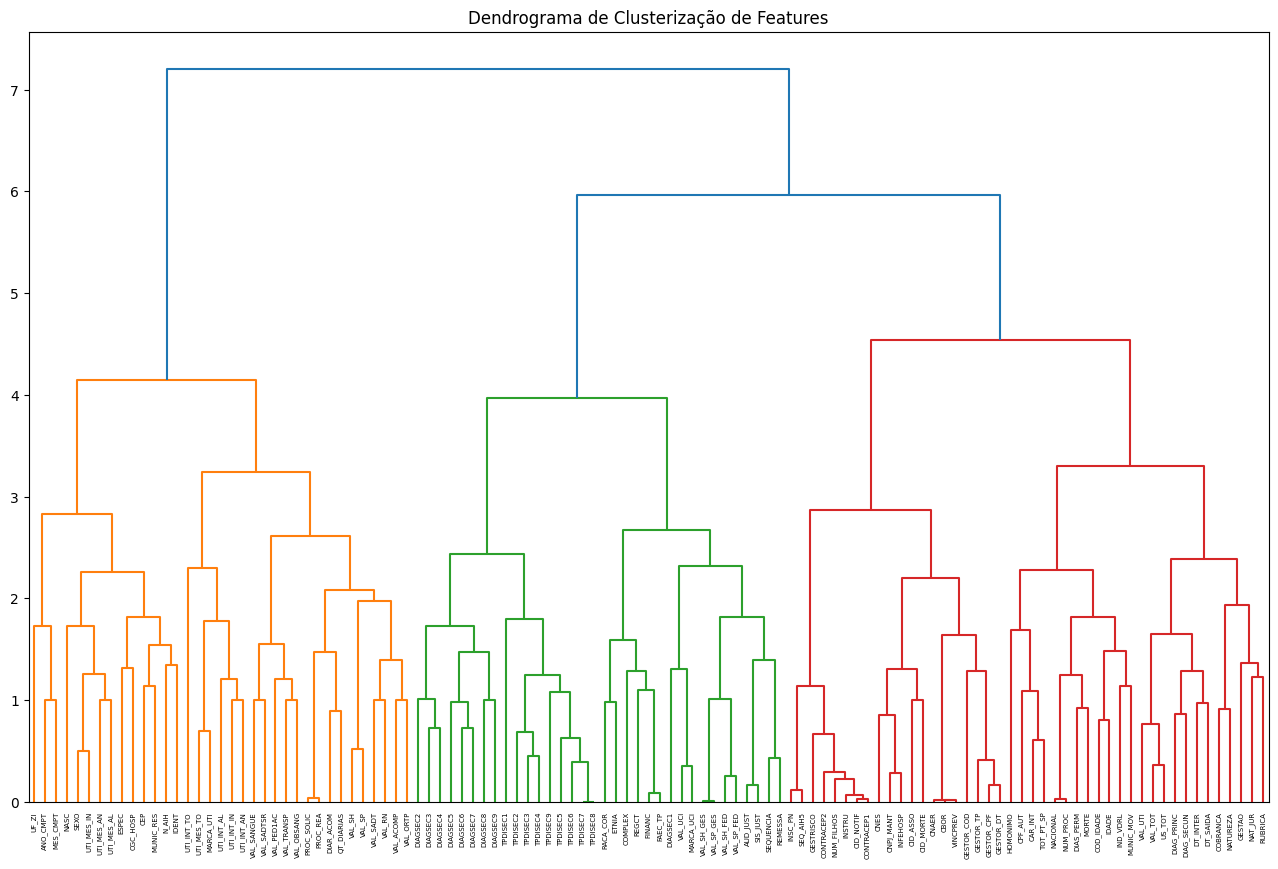

In [ ]:
corr_matrix = df.corr().abs()

print("Valores NaN na matriz:", corr_matrix.isna().sum().sum())

corr_matrix = corr_matrix.fillna(0)

distance_matrix = 1 - corr_matrix

distance_matrix = np.triu(distance_matrix.values)

distance_matrix = np.nan_to_num(distance_matrix, nan=0.0, posinf=1.0, neginf=1.0)

linkage = hierarchy.linkage(distance_matrix, method='average')

plt.figure(figsize=(16, 10))
dendro = hierarchy.dendrogram(linkage, labels=corr_matrix.columns, leaf_rotation=90)
plt.title('Dendrograma de Clusterização de Features')
plt.show()

**Conclusão**

É interessante verificar quais as features que estão presentes no dataset com as relações mostradas no gráfico, pricipalmente com foco na target VAL_TOT.